In [1]:

import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from urllib.request import urlopen
import re

import pandas as pd
import matplotlib.pyplot as plt

from nltk import FreqDist
from collections import Counter
nltk.download('brown')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\MOHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MOHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MOHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MOHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MOHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
! pip install inflect

In [3]:
import inflect

In [4]:
p = inflect.engine()

In [5]:
lemmatizer = WordNetLemmatizer()

In [6]:
f1 = open("E:/T1.txt",'r') 
f2 = open("E:/T2.txt",'r')

In [7]:
def remove_not_needed_text(t):
    start = t.find('*** START OF THE PROJECT ')
    end = t.find('*** END OF THE PROJECT ')
    t = t[start:end]
    return t

In [8]:
def remove_chap(t):
    t=re.sub(r"CHAPTER [A-Z]+","",t)
    return t

In [9]:
def to_lowercase(t):
  return t.lower()

In [10]:
def remove_apos(t):   
    t = re.sub(r"won\'t", "will not", t)
    t = re.sub(r"can\'t", "can not", t)
    t = re.sub(r"don\'t", "do not", t)  
    
    t = re.sub(r"\'s", " is", t)
    t = re.sub(r"\'ll", " will", t)
    t = re.sub(r"\'ve", " have", t)
    t = re.sub(r"\'m", " am", t) 
    t = re.sub(r"n\'t", " not", t)
    t = re.sub(r"\'re", " are", t)
    
    return t

In [11]:
def remove_link(t):
    return re.sub(r"http\S+", "", t)

In [12]:
def remove_punc_num(t):
    t = re.sub("[^\w\s]","",t)
    t = re.sub("[0-9]","",t)
    return t

In [13]:
def tokenize(t):
    token = nltk.word_tokenize(t)
    return token

In [14]:
def lemmatize_word(text): 
    word_tokens = tokenize(text)  
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas)

In [15]:
##Preprocessing on b1

In [16]:
b1 = f1.read()
b1 = remove_not_needed_text(b1)
b1 = remove_chap(b1)
b1 = to_lowercase(b1)
b1 = remove_apos(b1)
b1 = remove_link(b1)
b1 = remove_punc_num(b1)
b1 = lemmatize_word(b1)

In [17]:
##preprocessing on b2

In [18]:
b2 = f2.read()
b2 = remove_not_needed_text(b2)
b2 = remove_chap(b2)
b2 = to_lowercase(b2)
b2 = remove_apos(b2)
b2 = remove_link(b2)
b2 = remove_punc_num(b2)
b2 = lemmatize_word(b2)

In [19]:
def noun(text):
  is_noun = lambda pos: pos[:1] == 'N'
  tokenized = nltk.word_tokenize(text)
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
  return nouns

In [20]:
noun1=noun(b1)
noun2=noun(b2)

In [21]:
print("Number of nouns in book 1 and book 2 respectively are "+ str(len(noun1))+" and "+ str(len(noun2)))

Number of nouns in book 1 and book 2 respectively are 11653 and 8625


In [22]:
def verb(text):
  is_verb = lambda pos: pos[:1] == 'V'
  tokenized = nltk.word_tokenize(text)
  verbs = [word for (word, pos) in nltk.pos_tag(tokenized) if is_verb(pos)] 
  return verbs

In [23]:
verb1=verb(b1)
verb2=verb(b2)

In [24]:
print("Number of verbs in book 1 and book 2 respectively are "+ str(len(verb1))+" and "+ str(len(verb2)))

Number of verbs in book 1 and book 2 respectively are 9445 and 5683


In [25]:
from nltk.corpus import wordnet as wn

In [26]:
def synset(words):
  categories=[]
  for w in words:
    cat=[]
    for synset in wn.synsets(w):
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        cat.append(synset.lexname())
      if('verb' in synset.lexname()):
        cat.append(synset.lexname())
    categories.append(cat)
  return categories

In [27]:
noun_synset1=synset(noun1)
noun_synset2=synset(noun2)
verb_synset1=synset(verb1)
verb_synset2=synset(verb2)

In [28]:
print(noun1[58])

persons


In [29]:
print(noun_synset1[58][:])

['noun.body', 'noun.communication']


In [30]:
def all_synsets(no,ve):
  nouns=[]
  verbs=[]
  for word in no:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
  for word in ve:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
  return nouns,verbs

In [31]:
noun_superset1,verb_superset1=all_synsets(noun1,verb1)
noun_superset2,verb_superset2=all_synsets(noun2,verb2)

In [32]:
print(noun_superset1)

['noun.event', 'noun.time', 'noun.act', 'noun.act', 'noun.act', 'noun.location', 'noun.communication', 'noun.attribute', 'noun.act', 'noun.cognition', 'noun.person', 'noun.location', 'noun.group', 'noun.location', 'noun.person', 'noun.location', 'noun.group', 'noun.location', 'noun.person', 'noun.quantity', 'noun.attribute', 'noun.quantity', 'noun.quantity', 'noun.quantity', 'noun.communication', 'noun.communication', 'noun.artifact', 'noun.communication', 'noun.communication', 'noun.possession', 'noun.group', 'noun.group', 'noun.communication', 'noun.communication', 'noun.communication', 'noun.artifact', 'noun.group', 'noun.communication', 'noun.artifact', 'noun.communication', 'noun.communication', 'noun.possession', 'noun.group', 'noun.group', 'noun.communication', 'noun.communication', 'noun.communication', 'noun.artifact', 'noun.group', 'noun.quantity', 'noun.attribute', 'noun.quantity', 'noun.quantity', 'noun.quantity', 'noun.communication', 'noun.artifact', 'noun.group', 'noun.a

In [33]:
len(noun_superset1)

75171

([<matplotlib.axis.XTick at 0x26b4bee5850>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

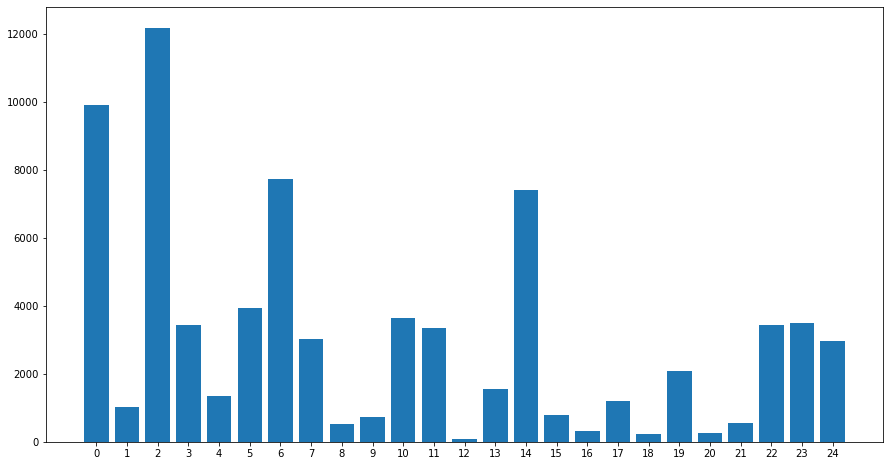

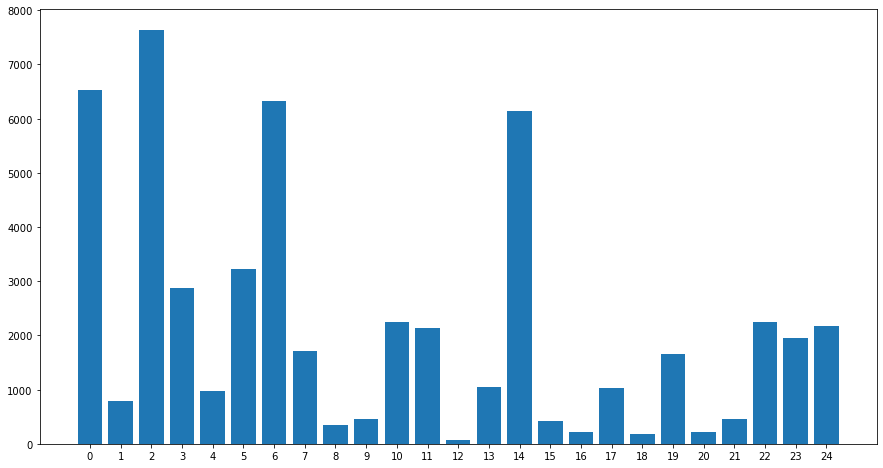

In [34]:
import numpy as np
labels, counts = np.unique(noun_superset1,return_counts=True)
import matplotlib.pyplot as plt 
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(noun_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [35]:
print(labels)

['noun.act' 'noun.animal' 'noun.artifact' 'noun.attribute' 'noun.body'
 'noun.cognition' 'noun.communication' 'noun.event' 'noun.feeling'
 'noun.food' 'noun.group' 'noun.location' 'noun.motive' 'noun.object'
 'noun.person' 'noun.phenomenon' 'noun.plant' 'noun.possession'
 'noun.process' 'noun.quantity' 'noun.relation' 'noun.shape' 'noun.state'
 'noun.substance' 'noun.time']


([<matplotlib.axis.XTick at 0x26b4c027e20>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

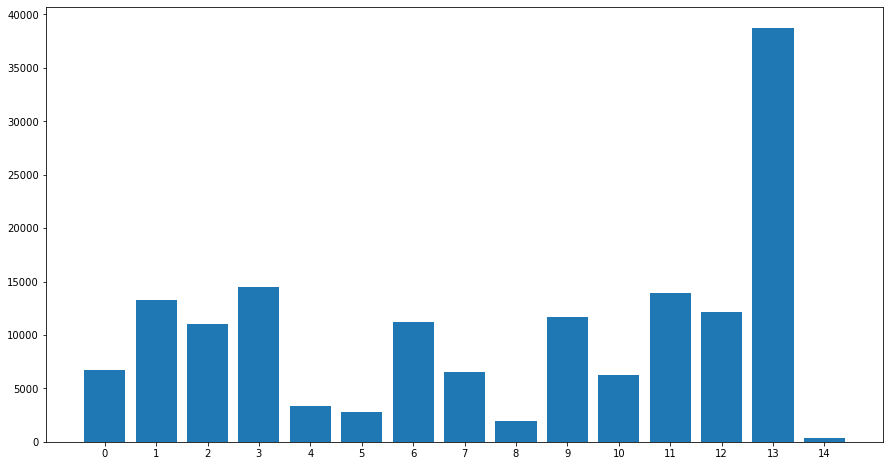

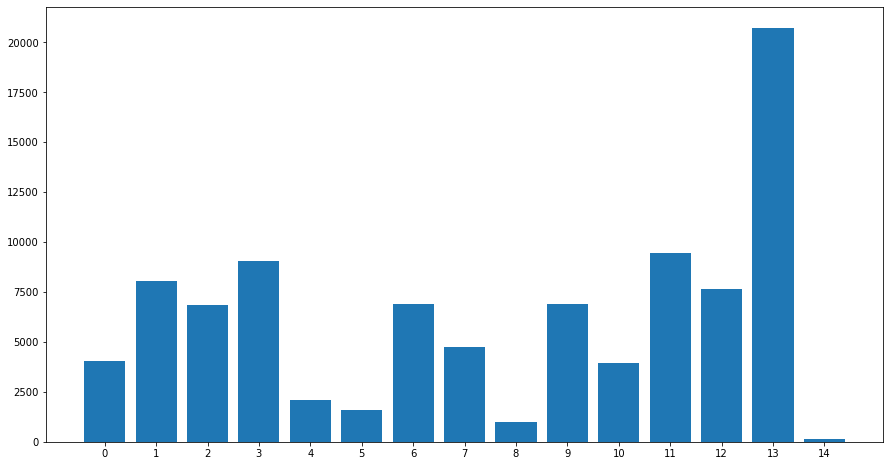

In [36]:
labels, counts = np.unique(verb_superset1,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(verb_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [37]:
##Named entity recognition

In [19]:
import spacy
from spacy import displacy
from collections import Counter

In [20]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [40]:
d1 = nlp(b1)
d2 = nlp(b2)
print("There are total "+str(len(d1.ents))+" entities in Book 1 and "+str(len(d2.ents))+" in Book 2")

There are total 838 entities in Book 1 and 777 in Book 2


In [41]:
print([(X, X.ent_iob_) for X in d1])

[(start, 'O'), (of, 'O'), (the, 'O'), (project, 'O'), (gutenberg, 'O'), (ebook, 'O'), (a, 'O'), (town, 'O'), (be, 'O'), (drown, 'O'), (a, 'O'), (town, 'O'), (be, 'O'), (drown, 'O'), (by, 'O'), (frederik, 'O'), (pohl, 'O'), (and, 'O'), (c, 'O'), (m, 'O'), (kornbluth, 'O'), (ballantine, 'O'), (book, 'O'), (new, 'B'), (york, 'I'), (this, 'O'), (be, 'O'), (an, 'O'), (original, 'O'), (novelnot, 'O'), (a, 'O'), (reprintpublished, 'O'), (by, 'O'), (ballantine, 'O'), (book, 'O'), (inc, 'O'), (by, 'O'), (frederik, 'O'), (pohl, 'O'), (and, 'O'), (c, 'O'), (m, 'O'), (kornbluth, 'O'), (library, 'O'), (of, 'O'), (congress, 'B'), (catalog, 'O'), (card, 'O'), (no, 'O'), (print, 'O'), (in, 'O'), (usa, 'B'), (ballantine, 'I'), (book, 'I'), (inc, 'I'), (fifth, 'I'), (avenue, 'I'), (new, 'B'), (york, 'I'), (n, 'O'), (y, 'O'), (transcriber, 'O'), (be, 'O'), (note, 'O'), (extensive, 'O'), (research, 'O'), (do, 'O'), (not, 'O'), (uncover, 'O'), (any, 'O'), (evidence, 'O'), (that, 'O'), (the, 'O'), (us, 'O')

In [42]:
print([(X, X.ent_iob_) for X in d2])

[(start, 'O'), (of, 'O'), (the, 'O'), (project, 'O'), (gutenberg, 'O'), (ebook, 'O'), (nick, 'B'), (carter, 'I'), (stories, 'O'), (no, 'O'), (dec, 'O'), (oct, 'O'), (nick, 'B'), (carter, 'I'), (stories, 'O'), (_, 'O'), (issued, 'O'), (weekly, 'B'), (enter, 'O'), (as, 'O'), (secondclass, 'O'), (matter, 'O'), (at, 'O'), (the, 'B'), (new, 'I'), (york, 'I'), (post, 'I'), (office, 'O'), (by, 'O'), (_, 'O'), (street, 'O'), (smith, 'O'), (_, 'O'), (seventh, 'B'), (ave, 'O'), (new, 'B'), (york, 'I'), (copyright, 'O'), (by, 'O'), (_, 'O'), (street, 'B'), (smith, 'I'), (_, 'O'), (o, 'O'), (g, 'O'), (smith, 'O'), (and, 'O'), (g, 'O'), (c, 'O'), (smith, 'O'), (proprietors, 'O'), (_, 'O'), (term, 'O'), (to, 'O'), (nick, 'B'), (carter, 'I'), (stories, 'I'), (mail, 'O'), (subscribers, 'O'), (_, 'O'), (postage, 'O'), (free, 'O'), (_, 'O'), (single, 'O'), (copy, 'O'), (or, 'O'), (back, 'O'), (number, 'O'), (c, 'O'), (each, 'O'), (months, 'O'), (c, 'O'), (months, 'O'), (c, 'O'), (months, 'B'), (one, 'I'

In [43]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location

In [44]:
person1,org1,location1=entity_recognition(b1)
person2,org2,location2=entity_recognition(b2)
print("number of person entities in book 1 and book 2 respectively are "+str(len(person1))+" and "+str(len(person2)))
print("number of organization entities in book 1 and book 2 respectively are "+str(len(org1))+" and "+str(len(org2)))
print("number of location entities in book 1 and book 2 respectively are "+str(len(location1))+" and "+str(len(location2)))

number of person entities in book 1 and book 2 respectively are 44 and 69
number of organization entities in book 1 and book 2 respectively are 42 and 51
number of location entities in book 1 and book 2 respectively are 34 and 49


In [45]:
print(person1)

['sharon', 'sam', 'sorry', 'groff', 'arthur', 'zehedi', 'syrian', 'dave', 'wax', 'murray', 'hill', 'froman', 'wheedle', 'sullivan', 'chesbro', 'suffer', 'loafer', 'mickey', 'scold', 'henry', 'starkman', 'thud', 'brissim', 'itwait', 'watch', 'brayer', 'wake', 'harry', 'dickie', 'anderson', 'george', 'e', 'neumann', 'jay', 'haggarty', 'ed', 'von', 'lutz', 'jack', 'nod', 'copy', 'morgan', 'zeckendorf', 'homestill']


In [46]:
def freq(str_list): 
    unique_words = set(str_list)
    counts = {}
    for words in unique_words : 
        counts[words] = str_list.count(words)
    return counts

In [47]:
X = freq(person1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('zehedi', 1), ('zeckendorf', 1), ('wheedle', 1), ('wax', 1), ('watch', 1), ('wake', 1), ('von', 1), ('thud', 1), ('syrian', 1), ('sullivan', 1), ('suffer', 1), ('starkman', 1), ('sorry', 1), ('sharon', 1), ('scold', 1), ('sam', 1), ('nod', 1), ('neumann', 1), ('murray', 1), ('morgan', 1), ('mickey', 1), ('lutz', 1), ('loafer', 1), ('jay', 1), ('jack', 1), ('itwait', 1), ('homestill', 1), ('hill', 1), ('henry', 1), ('harry', 1), ('haggarty', 1), ('groff', 1), ('george', 1), ('froman', 1), ('ed', 1), ('e', 1), ('dickie', 1), ('dave', 1), ('copy', 1), ('chesbro', 1), ('brissim', 1), ('brayer', 1), ('arthur', 1), ('anderson', 1)]


In [48]:
X = freq(location1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))

[('york', 1), ('wifei', 1), ('west', 1), ('washington', 1), ('valley', 1), ('usa', 1), ('thud', 1), ('the', 1), ('street', 1), ('springfield', 1), ('pittsburgh', 1), ('philadelphia', 1), ('pennsylvania', 1), ('palestine', 1), ('ohio', 1), ('new', 1), ('morrisania', 1), ('missouri', 1), ('mississippi', 1), ('lowder', 1), ('jersey', 1), ('italy', 1), ('hollywood', 1), ('hill', 1), ('hacienda', 1), ('fort', 1), ('detroit', 1), ('delaware', 1), ('connecticut', 1), ('city', 1), ('china', 1), ('chicago', 1), ('burgess', 1), ('america', 1)]


In [49]:
X = freq(org1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))

[('white', 1), ('usa', 1), ('twoandahalfton', 1), ('the', 1), ('take', 1), ('snap', 1), ('sharon', 1), ('red', 1), ('quartermaster', 1), ('of', 1), ('nowit', 1), ('mrs', 1), ('mimeograph', 1), ('mean', 1), ('lincoln', 1), ('inc', 1), ('house', 1), ('hill', 1), ('hebertown', 1), ('haggarty', 1), ('groff', 1), ('goudeket', 1), ('goddam', 1), ('gallop', 1), ('froman', 1), ('ford', 1), ('fifth', 1), ('fcc', 1), ('face', 1), ('cross', 1), ('congressman', 1), ('congress', 1), ('civil', 1), ('chesbro', 1), ('book', 1), ('be', 1), ('battalion', 1), ('ballantine', 1), ('avenue', 1), ('authority', 1), ('arthur', 1), ('aeronautics', 1)]


In [11]:
passage_1 = "Mickey Groff was a big man and not used to sitting. It gave him a cramped, unwelcome feeling of confinement."

In [12]:
passage_2="it's hotter than Avenue A, Mrs. Goudeket, and couldn't you air-condition a little, Mrs. Goudeket, and frankly, Mrs. Goudeket, what I wouldn't give to be back in our apartment on Eastern Parkway right now, we always get a breeze from the ocean."

In [13]:
passage_3="letters to friends in Palestine , wistful letters saying that maybe next year they'd have enough for a winter cruise"

In [14]:
passage_4="Goudeket's winter cruise to visit Palestine, new pine paneling in the recreation room, things you could lay your hand on. And Goudeket's Green Acres grew."

In [29]:
labels_1 = ([(X.label_) for X in nlp(passage_1).ents])

In [30]:
labels_2 = ([(X.label_) for X in nlp(passage_2).ents])

In [31]:
labels_3 = ([(X.label_) for X in nlp(passage_3).ents])

In [32]:
labels_4 = ([(X.label_) for X in nlp(passage_4).ents])